In [1]:
# Data Processing
import pandas as pd
import numpy as np
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("OptimizedDataset.csv")

In [3]:
df = df.dropna()

In [4]:
df

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Vb25,Vc25,Va34,Vb34,Vc34,Va45,Vb45,Vc45,Type of Fault,Fault Location
0,0.160758,-5492.28660,6258.3010,-767.07210,-6508.69200,8058.9500,-1550.25800,-2153.56000,3078.16770,-924.60767,...,7990.522000,-1876.353600,493.72815,-429.371280,-64.35689,-6.114168e+03,7990.522000,-1876.353600,No fault,No fault
1,0.505802,5485.93800,773.8655,-6259.81400,7211.04200,376.5860,-7587.62800,2840.45260,-223.27785,-2617.17480,...,0.158811,-7237.568400,-346.19644,-182.290310,528.48676,7.237410e+03,0.158811,-7237.568400,No fault,No fault
2,0.791913,32998.26600,-8657.6350,-24655.59800,-376.31598,7587.5034,-7211.18800,223.26718,2617.05880,-2840.32620,...,7237.398400,-7237.376500,182.31421,-528.501460,346.18732,-2.184740e-02,7237.398400,-7237.376500,No fault,No fault
3,0.413468,-6324.02000,938.6665,5385.61000,-8128.74900,1762.3964,6366.35250,-3095.16360,1000.79095,2094.37280,...,2081.242400,5968.902300,437.37125,50.849632,-488.22090,-8.050145e+03,2081.242400,5968.902300,No fault,No fault
4,0.983131,-386.44016,-5711.7837,6095.82200,-1069.32690,-6813.7330,7883.05960,-751.60190,-2281.43040,3033.03220,...,-6428.433000,7838.404000,-94.59090,504.986400,-410.39548,-1.409971e+03,-6428.433000,7838.404000,No fault,No fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115780,0.017296,1743.21250,-6587.3420,4844.10350,1599.53530,-8075.5933,6476.05600,232.39720,-2844.58840,-21775.24000,...,-7762.812000,5340.156000,-252.71303,536.451660,4137.90300,1.200189e+03,-7762.812000,5340.156000,SLG,L13
115781,0.869536,6090.85550,-5713.7676,-377.25632,7344.29300,-7467.2150,122.92225,2509.43040,-2916.40380,406.97336,...,-7469.591300,488.412380,-522.14417,369.607060,152.53706,6.981179e+03,-7469.591300,488.412380,No fault,No fault
115782,0.144692,-6261.96700,5485.0835,776.88324,-7588.74500,7209.7397,379.00540,-2617.89090,2840.19530,-222.30463,...,7236.354500,2.593651,528.53906,-346.090730,-182.44836,-7.238948e+03,7236.354500,2.593651,No fault,No fault
115783,0.458580,565947.30000,-281701.4700,-284150.72000,-376.87310,7587.7534,-7210.88040,222.90591,2617.38550,-2840.29130,...,7237.626000,-7237.626000,182.33234,-528.555400,346.22293,-1.114766e-08,7237.626000,-7237.626000,No fault,No fault


In [5]:
df.isna().any()

Number            False
IaL12             False
IbL12             False
IcL12             False
Ia13              False
Ib13              False
Ic13              False
Ia23              False
Ib23              False
Ic23              False
Ia24              False
Ib24              False
Ic24              False
Ia25              False
Ib25              False
Ic25              False
Ia34              False
Ib34              False
Ic34              False
Ia45              False
Ib45              False
Ic45              False
Va12              False
Vb12              False
Vc12              False
Va13              False
Vb13              False
Vc13              False
Va23              False
Vb23              False
Vc23              False
Va24              False
Vb24              False
Vc24              False
Va25              False
Vb25              False
Vc25              False
Va34              False
Vb34              False
Vc34              False
Va45              False
Vb45            

In [6]:
df.shape

(115785, 45)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115785 entries, 0 to 115784
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Number          115785 non-null  float64
 1   IaL12           115785 non-null  float64
 2   IbL12           115785 non-null  float64
 3   IcL12           115785 non-null  float64
 4   Ia13            115785 non-null  float64
 5   Ib13            115785 non-null  float64
 6   Ic13            115785 non-null  float64
 7   Ia23            115785 non-null  float64
 8   Ib23            115785 non-null  float64
 9   Ic23            115785 non-null  float64
 10  Ia24            115785 non-null  float64
 11  Ib24            115785 non-null  float64
 12  Ic24            115785 non-null  float64
 13  Ia25            115785 non-null  float64
 14  Ib25            115785 non-null  float64
 15  Ic25            115785 non-null  float64
 16  Ia34            115785 non-null  float64
 17  Ib34      

In [8]:
df.nunique()

Number            70118
IaL12             78869
IbL12             78863
IcL12             78756
Ia13              72547
Ib13              72413
Ic13              72437
Ia23              77087
Ib23              77176
Ic23              77116
Ia24              72839
Ib24              72746
Ic24              72725
Ia25              75658
Ib25              75711
Ic25              75590
Ia34              72839
Ib34              72746
Ic34              72725
Ia45              75926
Ib45              75842
Ic45              75726
Va12              72567
Vb12              72447
Vc12              72378
Va13              71318
Vb13              71334
Vc13              71288
Va23              71175
Vb23              71004
Vc23              71055
Va24              78466
Vb24              78339
Vc24              78391
Va25              72567
Vb25              72447
Vc25              72378
Va34              78702
Vb34              78796
Vc34              78707
Va45              72567
Vb45            

In [9]:
df["Type of Fault"].unique()

array(['No fault', 'L-L', 'SLG', 'L-L-L', 'L-L-L-G', 'Line fault', 'DLG'],
      dtype=object)

In [10]:
df["Fault Location"].unique()

array(['No fault', 'L23', 'L34', 'L45', 'L12', 'L24', 'L25', 'L13'],
      dtype=object)

In [11]:
X = df.drop(["Type of Fault","Fault Location"],axis="columns")

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Vc24,Va25,Vb25,Vc25,Va34,Vb34,Vc34,Va45,Vb45,Vc45
0,-0.970623,-0.002570,0.003103,-0.000660,-1.100141,1.348253,-0.257603,-0.140027,0.143163,-0.041303,...,0.003924,-1.079228,1.403783,-0.329388,0.034089,-0.013163,-0.008036,-1.079228,1.403783,-0.329388
1,0.162627,0.018703,-0.007293,-0.011692,1.176601,0.082939,-1.256836,0.180344,-0.005584,-0.111148,...,-0.033781,1.250405,0.014229,-1.266135,-0.013747,-0.004291,0.013393,1.250405,0.014229,-1.266135
2,1.102317,0.072015,-0.025170,-0.048638,-0.082495,1.270604,-1.194532,0.012449,0.122388,-0.120357,...,-0.026584,-0.012409,1.272812,-1.266102,0.016353,-0.016722,0.006804,-0.012409,1.272812,-1.266102
3,-0.140631,-0.004182,-0.006980,0.011697,-1.368984,0.311187,1.052660,-0.200431,0.049567,0.083278,...,0.041589,-1.417024,0.376138,1.041386,0.030879,0.004080,-0.023357,-1.417024,0.376138,1.041386
4,1.730343,0.007323,-0.019586,0.013123,-0.197497,-1.101333,1.303687,-0.050090,-0.098315,0.122012,...,0.043508,-0.258422,-1.103726,1.368038,0.000582,0.020387,-0.020544,-0.258422,-1.103726,1.368038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115780,-1.441803,0.011450,-0.021246,0.010609,0.245391,-1.309166,1.070817,0.013035,-0.123688,-0.901722,...,-0.346195,0.197008,-1.335779,0.931528,-0.008423,0.021517,0.143860,0.197008,-1.335779,0.931528
115781,1.357258,0.019875,-0.019590,0.000123,1.198713,-1.208964,0.019322,0.159109,-0.126923,0.013646,...,0.001674,1.205697,-1.284787,0.083799,-0.023768,0.015526,-0.000196,1.205697,-1.284787,0.083799
115782,-1.023388,-0.004062,0.001637,0.002441,-1.279372,1.208385,0.061706,-0.169814,0.132441,-0.012322,...,0.013598,-1.275484,1.272630,-0.001086,0.036071,-0.010172,-0.012305,-1.275484,1.272630,-0.001086
115783,0.007533,1.104740,-0.542727,-0.569805,-0.082587,1.270645,-1.194481,0.012426,0.122403,-0.120355,...,-0.026583,-0.012405,1.272851,-1.266145,0.016354,-0.016724,0.006805,-0.012405,1.272851,-1.266145


In [53]:
Y1 = df["Type of Fault"]
Y2 = df["Fault Location"]

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y1,test_size=0.2,random_state=42)

In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [70]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = rf_model.predict(X_test)

In [72]:
from sklearn.metrics import classification_report, accuracy_score

In [74]:
accuracy = accuracy_score(Y_test,y_pred)

In [75]:
accuracy

0.9860949173036231

In [76]:
print(classification_report(Y_test_original,y_pred))

              precision    recall  f1-score   support

         DLG       0.94      0.96      0.95       700
         L-L       0.96      0.94      0.95       664
       L-L-L       0.64      0.66      0.65       297
     L-L-L-G       0.49      0.44      0.46       205
  Line fault       0.90      0.95      0.92       290
    No fault       1.00      1.00      1.00     20454
         SLG       0.96      0.97      0.97       547

    accuracy                           0.99     23157
   macro avg       0.84      0.84      0.84     23157
weighted avg       0.99      0.99      0.99     23157



## Class Imbalance
## Other metrics
## Overfitting
## Domain Specific Needs (In critical systems like power transmission lines, even a small number of undetected faults can have serious consequences. Thus, a high recall for fault types might be more important than accuracy.)

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_original, y_pred,labels=rf_model.classes_)
print(cm)

[[  672    12     0     0     4     0    12]
 [   24   622     0     0    14     0     4]
 [    3     4   195    94     1     0     0]
 [    2     2   111    90     0     0     0]
 [    4     7     0     0   275     0     4]
 [    0     2     0     0     0 20452     0]
 [    7     0     0     0    11     0   529]]


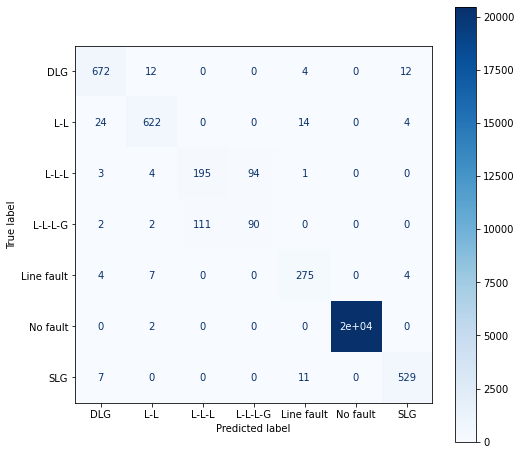

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_model.classes_)
disp.plot(cmap="Blues",ax=plt.gca())
plt.show()

In [79]:
class_counts = Y_train_original.value_counts()

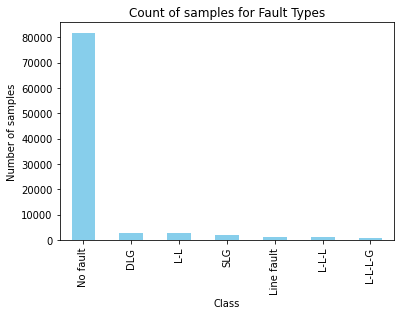

In [80]:
class_counts.plot(kind='bar',color='skyblue',title='Count of samples for Fault Types')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

In [81]:
classes = Y2.value_counts()

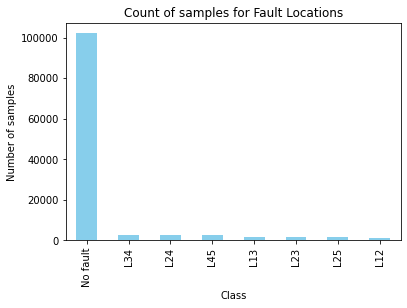

In [82]:
classes.plot(kind='bar',color='skyblue',title='Count of samples for Fault Locations')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =42)
X_test_res,Y_test_res = sm.fit_resample(X_test,Y_test.ravel())
X_test_res

,Number,IaL12,IbL12,IcL12,Ia13,Ib13,Ic13,Ia23,Ib23,Ic23,...,Vc24,Va25,Vb25,Vc25,Va34,Vb34,Vc34,Va45,Vb45,Vc45
0,-1.388845,0.008785,-0.020308,0.012379,-0.043279,-1.187274,1.236237,-1.409664,0.127669,0.789597,...,1.187143,-0.031201,0.017949,0.013517,5.071771,-0.602016,-2.612529,-0.031201,0.017949,0.013517
1,-1.427211,0.020451,-0.010829,-0.009757,1.338981,-0.301994,-1.031975,0.197661,2.479716,-2.398562,...,-0.869609,1.401142,-0.861397,-0.537312,-0.019368,-0.337842,0.352734,1.401142,-0.861397,-0.537312
2,-0.449012,0.019959,-0.019485,-0.000075,1.209025,-1.198982,-0.000993,0.160856,-0.126114,0.011780,...,0.001060,1.217126,-1.275263,0.062785,-0.023867,0.015322,0.000072,1.217126,-1.275263,0.062785
3,-1.417780,0.009733,0.001562,-0.011777,0.256396,1.080244,-1.341238,1.575392,-0.964091,-0.130637,...,-0.032161,0.707653,0.691884,-1.403489,-5.398314,3.393904,0.009982,0.707653,0.691884,-1.403489
4,-1.168584,0.010740,-0.021050,0.011131,0.168604,-1.281761,1.119862,0.002952,-0.119789,0.108756,...,0.036812,0.113237,-1.307737,1.208415,-0.009078,0.020857,-0.015452,0.113237,-1.307737,1.208415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143173,-1.424311,0.018388,-0.006771,-0.011917,1.145347,0.138164,-1.281158,0.176708,-0.994382,-0.114016,...,-0.034349,1.220447,-0.192168,-1.293523,-0.012818,-0.676144,0.013516,1.220447,-0.192168,-1.293523
143174,-1.349161,0.007296,0.002785,-0.010547,-0.004410,1.229411,-1.231017,0.023449,-0.006734,-0.123025,...,-0.027956,0.067614,-0.002739,-1.300637,0.014724,-0.087434,0.007569,0.067614,-0.002739,-1.300637
143175,-1.441517,0.008440,-0.020077,0.012491,-0.125776,-1.134045,1.265026,-0.106241,-0.102348,0.119105,...,0.042114,-0.150246,-1.140469,1.330874,2.315741,0.020560,-0.019794,-0.150246,-1.140469,1.330874
143176,-1.405766,-0.004484,0.000881,0.003680,-1.331282,1.132020,0.190216,-0.335111,0.126016,-0.000365,...,0.017409,-0.202022,1.198637,0.131997,0.067213,-0.008760,-0.013926,-0.202022,1.198637,0.131997


In [87]:
Y_pred_res = rf_model.predict(X_test_res)

In [88]:
accuracy1 = accuracy_score(Y_test_res,Y_pred_res)
accuracy1

0.8251686711645644